In [35]:
pwd()

"/home/zyu20/git/BulkLMM.jl/test"

In [2]:
cd("..")

In [3]:
Threads.nthreads()

24

In [9]:
include("BXDdata_for_test.jl"); ## Load BXD data used for testing:

In [12]:
using LoopVectorization

In [99]:
include("../src/scan_LiteQTL.jl"); ## Load multithreaded functions to be tested:

In [27]:
include("../src/parallel_helpers.jl");

In [28]:
BLAS.set_num_threads(24)

In [29]:
BLAS.get_num_threads()

24

In [30]:
hsq_list = collect(0:10) * 0.1;

In [70]:
kinship_Gc = CSV.read("run-gemma/output/kinship.cXX.txt", DataFrame, delim = '\t', header = false) |> Matrix;

In [ ]:
@time bulkscan_LODs = bulkscan(pheno, geno, kinship, hsq_list);

LoadError: DomainError with -3.791154154143661e11:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [98]:
real(log10(Complex(-1)))

0.0

In [73]:
bulkscan_LODs[1:6, :]

6×35556 Matrix{Float64}:
 0.0957757  0.130312  0.094194  0.0362664  …  0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664     0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664     0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664     0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664     0.0466633  0.354027  0.539208
 0.0957757  0.130312  0.094194  0.0362664  …  0.0466633  0.354027  0.539208

In [74]:
gemma = "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64";

In [75]:
gemma_results = readdlm("run-gemma/output/gemma_results.txt.assoc.txt", '\t');

In [76]:
function p2lod(pval::Float64)
    
    lrs = -log10(pval)*2*log(10)
    lod = lrs/(2*log(10))
    
    # return lrs
    return lod

end

p2lod (generic function with 1 method)

In [77]:
gemma_LODs = map(x -> p2lod(x), gemma_results[2:end, 10]);

In [78]:
test_y1 = reshape(pheno[:, 1], :, 1);

In [79]:
testlod_1 = scan_null(test_y1, geno, kinship; reml = false)[3];

In [80]:
hcat(testlod_1, bulkscan_LODs[:, 1])

7321×2 Matrix{Float64}:
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120087  0.0957757
 0.000120007  0.0957793
 0.00953337   0.201649
 ⋮            
 0.260178     0.256527
 0.260178     0.256527
 0.260178     0.256527
 0.252712     0.252758
 0.378291     0.373096
 0.378291     0.373096
 0.219357     0.216899
 0.200273     0.198309
 0.202546     0.20053
 0.177705     0.176191
 0.181695     0.178684
 0.181695     0.178684

In [82]:
hcat(gemma_LODs, bulkscan_LODs[:, 7919])

7321×2 Matrix{Float64}:
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140798  0.0226957
 0.0140767  0.0226982
 0.0956639  0.148289
 ⋮          
 0.689165   0.341669
 0.689165   0.341669
 0.689165   0.341669
 0.392849   0.150139
 0.0056495  0.176887
 0.0056495  0.176887
 0.0148848  0.204484
 0.0380779  0.243271
 0.0356182  0.239282
 0.0597129  0.276782
 0.0418368  0.234898
 0.0418368  0.234898

In [94]:
using Plots

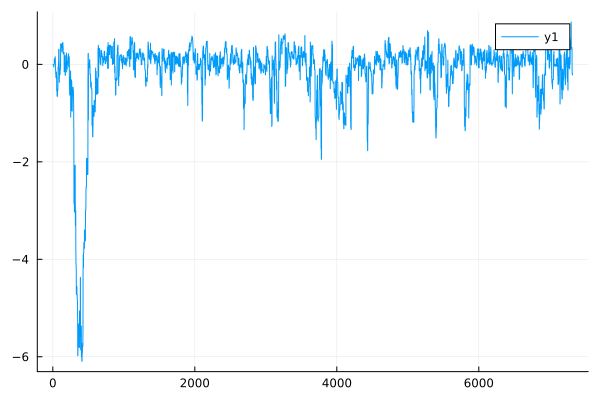

In [95]:
plot(gemma_LODs .- bulkscan_LODs[:, 7919])